# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Herly Riyanto Hidayat
- Email: herlynjjd@gmail.com
- Id Dicoding: heryryanth

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import joblib # Save the model

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# URL to the raw dataset
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

# Load the dataset
df = pd.read_csv(url, sep=';')

# Display the first five rows
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Check missing Value

In [3]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Check the duplicated value

In [4]:
df.duplicated().sum()

np.int64(0)

### Check varians of data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [24]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


**insight**
1. Data tidak memiliki missing value, dan duplicated value
2. Tipe datanya memiliki 7 kolom bertipe float, 29 kolom bertipe int, dan 1 kolom bertipe object
3. 1 kolom bertipe object yang nama kolomnya Status, merupakan target, dan 36 kolom lainnya ada feature

### Exploratory Data Analysis

#### Univariate Analysis on Status column

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Percentage Distribution:
Status
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: count, dtype: float64


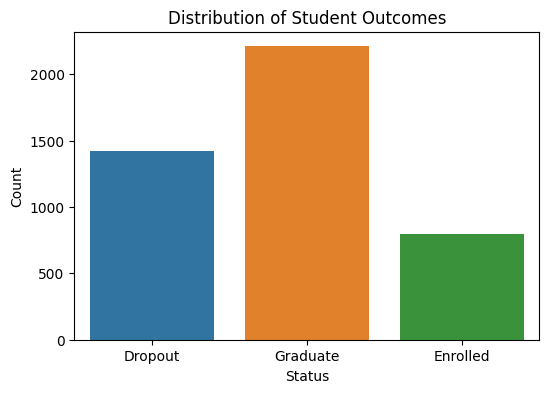

In [6]:
# Count the occurrences of each category in the target variable
status_counts = df['Status'].value_counts()
print(status_counts)

print("\nPercentage Distribution:")
print((status_counts / len(df) * 100).round(2))

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Status', hue='Status')
plt.title('Distribution of Student Outcomes')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis Effect of Admission_grade on Status column

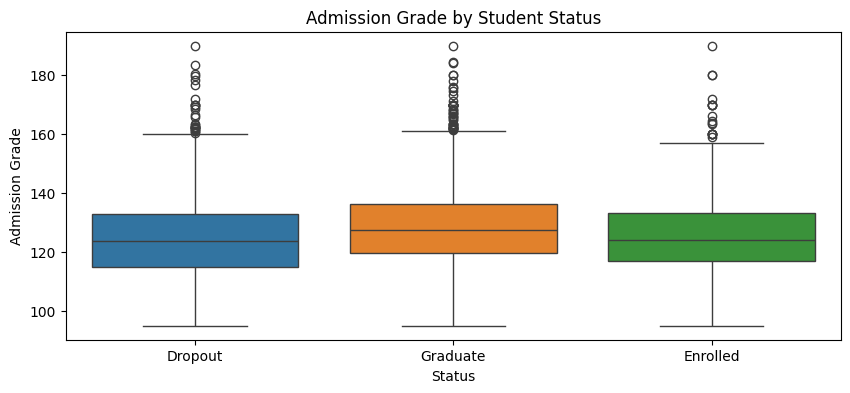

In [7]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Status', y='Admission_grade', data=df, hue='Status')
plt.title('Admission Grade by Student Status')
plt.ylabel('Admission Grade')
plt.xlabel('Status')
plt.show()

#### Bivariate Analysis Effect of First Semester Grade on Status column

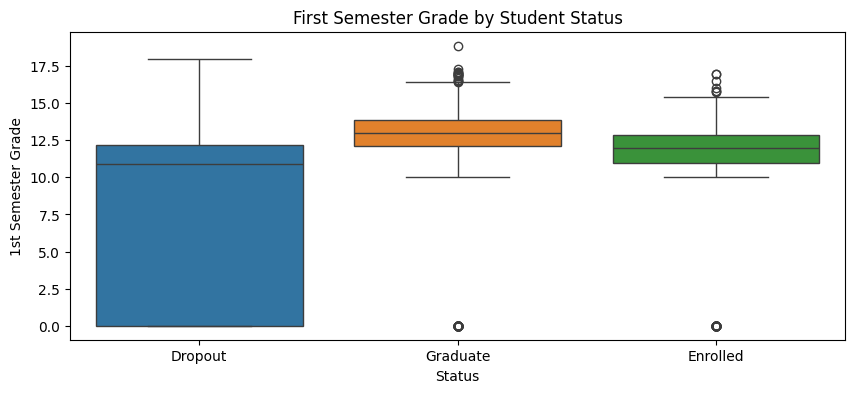

In [8]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df, hue='Status')
plt.title('First Semester Grade by Student Status')
plt.ylabel('1st Semester Grade')
plt.xlabel('Status')
plt.show()

#### Bivariate Analysis Effect of Scholarship on Status column

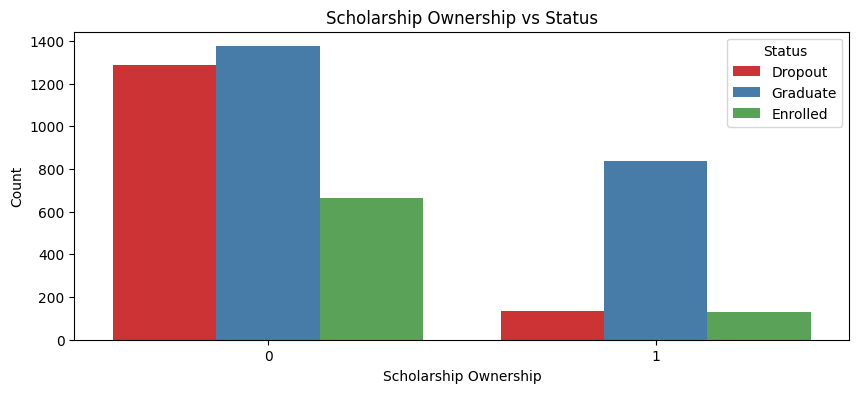

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette='Set1')
plt.title('Scholarship Ownership vs Status')
plt.ylabel('Count')
plt.xlabel('Scholarship Ownership')
plt.show()

#### Bivariate Analysis Effect of Tuition Fee on Status column

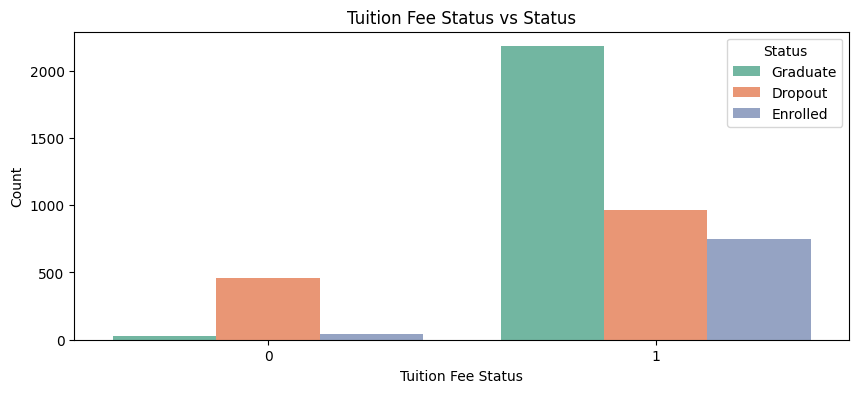

In [10]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df, palette='Set2')
plt.title('Tuition Fee Status vs Status')
plt.ylabel('Count')
plt.xlabel('Tuition Fee Status')
plt.show()

#### Bivariate Analysis Effect of Debtor on Status column

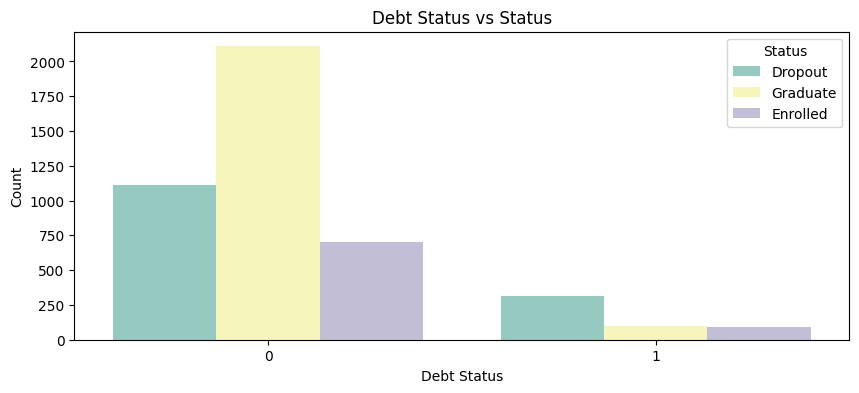

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Debtor', hue='Status', data=df, palette='Set3')
plt.title('Debt Status vs Status')
plt.ylabel('Count')
plt.xlabel('Debt Status')
plt.show()

#### Correlation Matrix

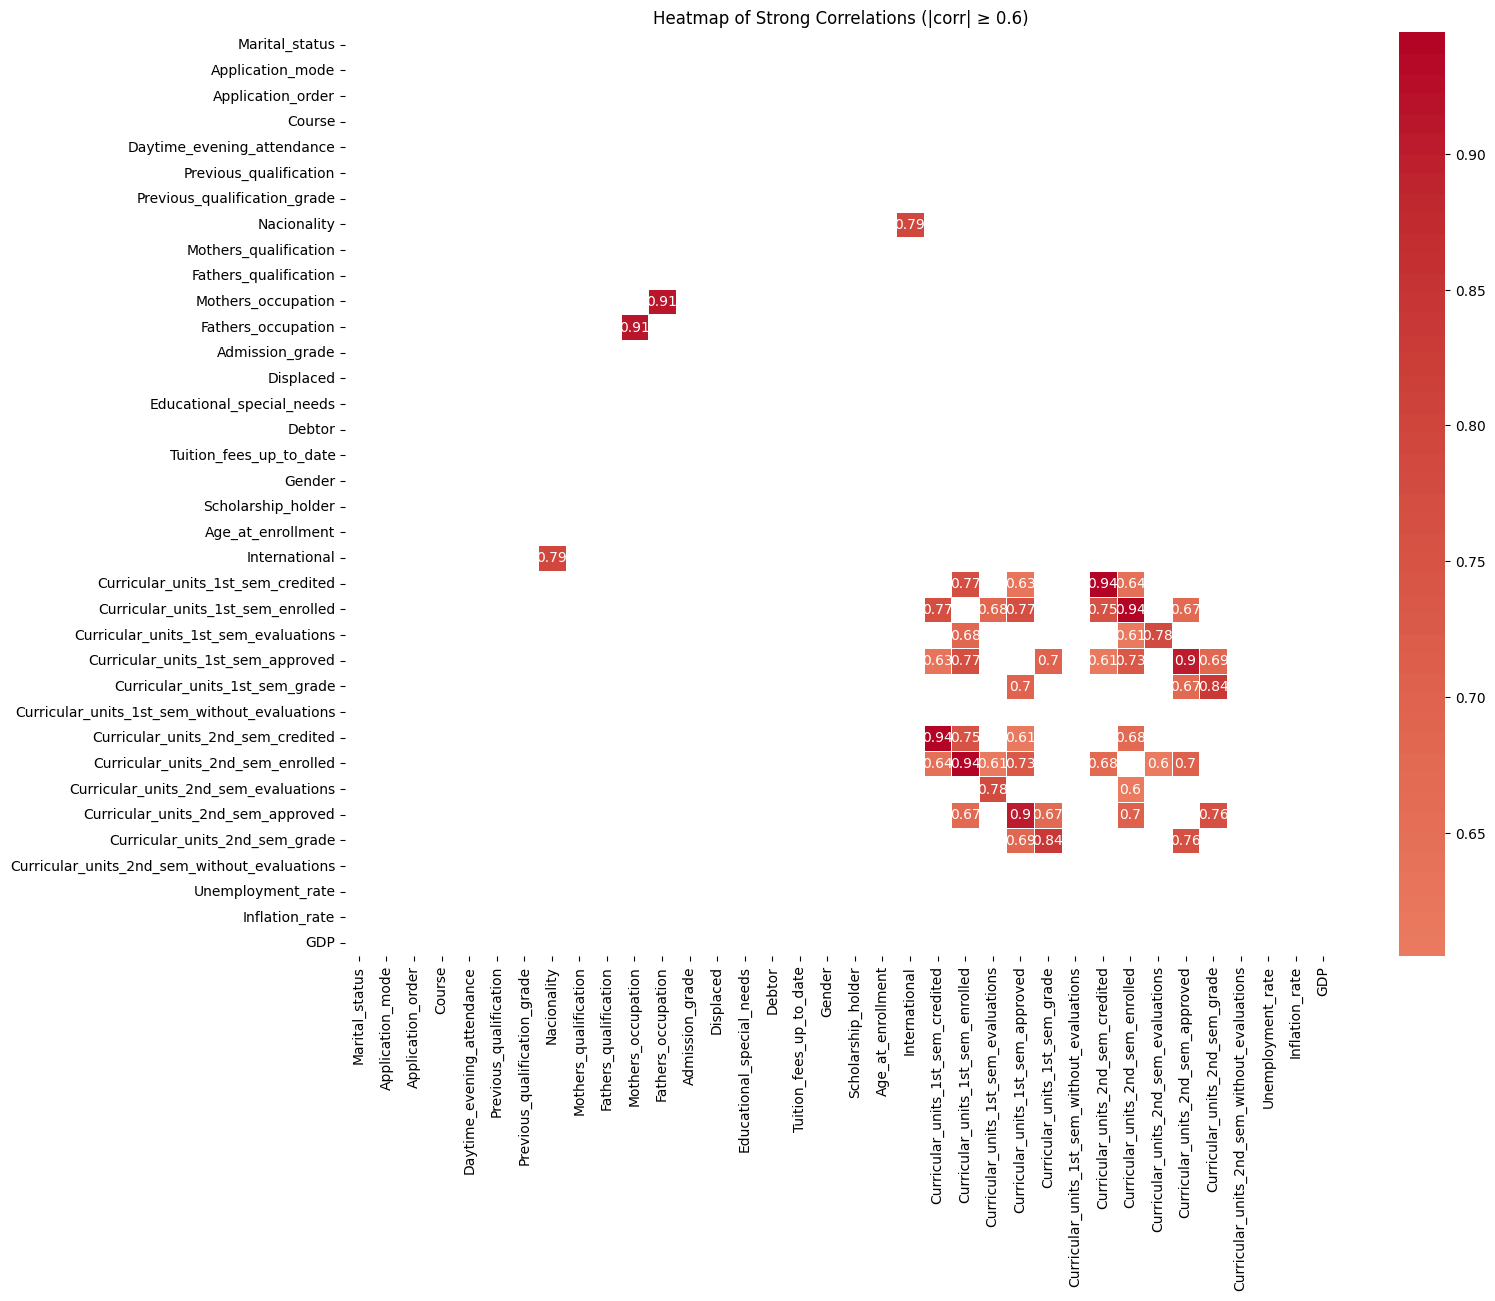

In [12]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the full correlation matrix
corr_matrix = numeric_df.corr()

# Set a threshold for "strong" correlation
threshold = 0.6
strong_corr = corr_matrix[(abs(corr_matrix) >= threshold) & (abs(corr_matrix) < 1)]

# Visualize with a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap of Strong Correlations (|corr| ≥ 0.6)')
plt.show()

**Insight:**
1. Siswa dengan Admission Grade (Nilai Penerimaan) yang tinggi cenderung lebih bisa Graduate
2. Siswa dengan Nilai Semester pertama yang tinggi cenderung Graduate
3. Siswa yang mendapatkan Beasiswa rate Dropoutnya lebih kecil dari pada siswa yang tidak mendapatkan Beasiswa (Scholarschip)
4. Pengaruh dari Tuition Fee bisa dibilang dapat mempengaruhi rate Dropout yang lebih tinggi
5. Debt Status memiliki pengaruh terhadap siswa yang Graduate dan juga Dropout

## Data Preparation / Preprocessing

#### Remove Irrelevant Data with Bussines Problem

In [13]:
# Drop row with status column 'Enrolled'
df = df[df['Status'] != 'Enrolled']

# Check the unique values in the 'Status' column
unique_status = df['Status'].unique()
print("Unique values in 'Status' column:", unique_status)

Unique values in 'Status' column: ['Dropout' 'Graduate']


#### Encode Status Column with LabelEncoder()

In [14]:
# Copy original dataframe to avoid modifying raw data
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Status' column
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

#### Select Features using SelectKBest()

In [15]:
# Separate features and target
X = df_encoded.drop(['Status'], axis=1)
y = df_encoded['Status']

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
mask = selector.get_support()
selected_features = X.columns[mask]

print("Top 10 selected features:")
print(selected_features)

# Create new DataFrame with selected features
df_selected_kbest = df_encoded[selected_features.tolist() + ['Status']]

Top 10 selected features:
Index(['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
       'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'],
      dtype='object')


#### Standardization using StandardScaler()

In [16]:
# Separate features and target
X = df_selected_kbest.drop('Status', axis=1)
y = df_selected_kbest['Status']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Balancing Data using SMOTE

In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 2209, 1: 2209})


#### Splitting Data with 70% train 30% test

In [18]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

## Modeling

In [19]:
# Model Inisialization
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

# K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  
    n_jobs=-1,
    verbose=2
)

# Train Model
grid_search.fit(X_resampled, y_resampled)

# Output best parameter
print("\n✅ Best Parameters Found:")
print(grid_search.best_params_)

# Using best model
best_rf_model_grid = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits

✅ Best Parameters Found:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Evaluation

In [20]:
y_pred_random = best_rf_model_grid.predict(X_resampled)
print(classification_report(y_resampled, y_pred_random))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2209
           1       0.99      0.98      0.99      2209

    accuracy                           0.99      4418
   macro avg       0.99      0.99      0.99      4418
weighted avg       0.99      0.99      0.99      4418



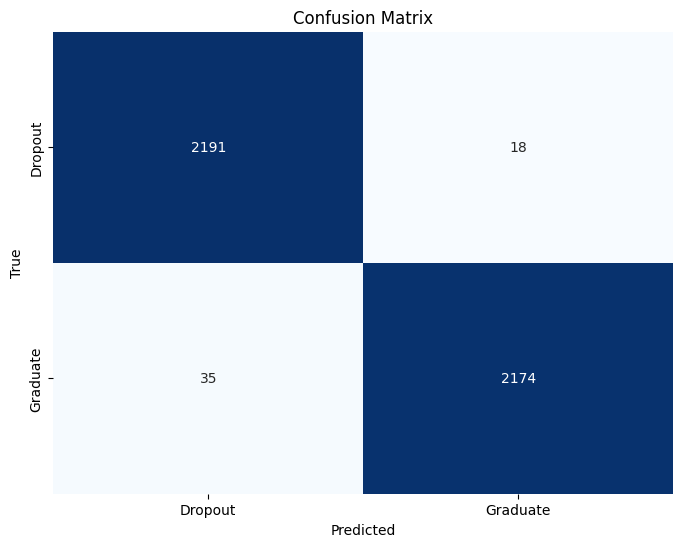

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_resampled, y_pred_random)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Save The Model, StandardScaler, LabelEncoder, and Selected Features

In [22]:
# Save the trained model to a file
joblib.dump(best_rf_model_grid, './model/model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder to a file
joblib.dump(le, 'label_encoder.pkl')

# Save the selected features (removing the 'Status' target)
selected_features = [feature for feature in selected_features if feature != 'Status']
joblib.dump(selected_features, 'features.pkl')

print("Model, scaler, label encoder, and features saved successfully.")

Model, scaler, label encoder, and features saved successfully.


## Export Cleaned Data

In [23]:
# LabelEncoder status 
df_selected_kbest['Status'] = le.inverse_transform(df_selected_kbest['Status'])

# Save the cleaned dataset to a CSV file
df_selected_kbest.to_csv('cleaned_data.csv', index=False)

print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_7892\3042198528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_kbest['Status'] = le.inverse_transform(df_selected_kbest['Status'])
